In [26]:
import warnings
warnings.filterwarnings("ignore")

from prop_comparison_methods import *

In [27]:
#setting color scheme for this notebook

devstage_map = {
                "96hAEL":"96hAEL",
                "120hAEL":"120hAEL",
                "upcrawling":"wL3",
                "whitePupa":"0hAPF",
                "2hAPF":"2hAPF",
                "4hAPF":"4hAPF",
                "6hAPF":"6hAPF",
               }

color_dict = {
              '96hAEL':'#f1ef81',
              '120hAEL':'#efa636',
              'wL3':'#414243',
              '0hAPF':'#7d99cd', 
              '2hAPF':'#64a9dd', 
              '4hAPF':'#78cfdb',
              '6hAPF':'#71c382',
              'DV' : 'purple',
              'outDV' : 'green',
             }

columns = ['devstage', 'discName', 'region', 'k_dist', 
           'area','neighbour_number','elongation_tensor_norm_max', 
           'Qrr_geom_inPlane', 'Qphiphi', 'Qnn', 'Qrphi', 'Qrn', 'Qphin',
           'countInBin', 'cumcount',
           'k_dist_pathlength', #'k_dist_pathlength_poly' 
          ]

rois = ['outDV', 'DV']
devstage = "wL3" #since we are using only the reference stage we use just one stage

genotype = 'ecadGFPnbG4'
#genotype = 'ecadGFPnbG4myoVI'

In [28]:

df_names = ["../exp_data/height_volume/ecadGFPnbG4HeightVolumneTrunkated-acrossDV.pkl",
            "../exp_data/height_volume/ecadGFPnbG4HeightVolumneTrunkated-alongDV.pkl",
            "../exp_data/height_volume/ecadGFPnbG4myoVIHeightVolumneTrunkated-acrossDV.pkl",
            "../exp_data/height_volume/ecadGFPnbG4myoVIHeightVolumneTrunkated-alongDV.pkl"
           ]
#combine all files into a single dataframe
df_Height = pd.DataFrame()
for df_name in df_names:
    df_Height = pd.concat([df_Height, pd.read_pickle(df_name)])

devstage_map = {
                "96hAEL":"96hAEL",
                "120hAEL":"120hAEL",
                "upcrawling":"wL3",
                "whitePupa":"0hAPF",
                "2hAPF":"2hAPF",
                "4hAPF":"4hAPF",
                "6hAPF":"6hAPF",
               }
df_Height["devstage"] = [devstage_map[x] for x in df_Height["devstage"].values]
df_Height = df_Height.rename(columns={"disc": "discName"})

##########
# Filter #
##########

df_Height = df_Height[(df_Height['genotype'] == genotype) & (df_Height['devstage'] == "wL3")]
df = df_Height
df

,genotype,devstage,discName,region,k_dist,cell_id,k_dist_pathlength,area,linelength,height,volume,distanceFraction,k_fromDV,roi
11569,ecadGFPnbG4,wL3,20201013_ecadGFPnbG4_upcrawling_disc3,outDV,5,10004,12.038402,2.075880,12.0,43.200000,89.678003,0.199550,NaN,NaN
11570,ecadGFPnbG4,wL3,20201013_ecadGFPnbG4_upcrawling_disc3,outDV,5,10004,12.038402,2.075880,12.0,43.900000,91.131119,0.199550,NaN,NaN
11571,ecadGFPnbG4,wL3,20201013_ecadGFPnbG4_upcrawling_disc3,outDV,5,10004,12.038402,2.075880,12.0,43.700000,90.715943,0.199550,NaN,NaN
11572,ecadGFPnbG4,wL3,20201013_ecadGFPnbG4_upcrawling_disc3,outDV,5,10004,12.038402,2.075880,12.0,43.800000,90.923531,0.199550,NaN,NaN
11573,ecadGFPnbG4,wL3,20201013_ecadGFPnbG4_upcrawling_disc3,outDV,5,11297,12.348173,2.893588,12.0,43.200000,125.003016,0.204684,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,ecadGFPnbG4,wL3,20210706_ecadGFPnbG4_upcrawling_disc1,DV,0,12241,0.000000,5.329585,0.0,44.219855,235.673490,0.000000,0.0,DV
4062,ecadGFPnbG4,wL3,20210706_ecadGFPnbG4_upcrawling_disc1,DV,0,12430,0.000000,6.317460,0.0,44.219855,279.357188,0.000000,0.0,DV
4063,ecadGFPnbG4,wL3,20210706_ecadGFPnbG4_upcrawling_disc1,DV,0,12804,0.000000,6.744786,0.0,44.219855,298.253480,0.000000,0.0,DV
4064,ecadGFPnbG4,wL3,20210706_ecadGFPnbG4_upcrawling_disc1,DV,0,12825,0.000000,4.275378,0.0,44.219855,189.056616,0.000000,0.0,DV


In [29]:
groupby_cols = ['devstage', 'region', 'discName', 'k_dist']
#here we pool cells within a ring and calculate the mean and std
df_pool_k = df.groupby(groupby_cols).agg('mean').reset_index() 
#we offset k_dist values if the rings do not start with k_dits = 0
k_dist_offset = df.groupby(['discName']).k_dist.agg('min')#.reset_index().set_index('discName') #some discs can have k starting from non-zero value, so we offset them by the starting k
#df_pool_k['k_dist'] = df_pool_k['k_dist'] - k_dist_offset[df_pool_k['discName'].values].values #offsetting k values


#scale pathlength
#pathlength_max = df_pool_k.groupby(['discName']).k_dist_pathlength.agg('max')
#df_pool_k['pathlength_scaled'] = df_pool_k['k_dist_pathlength']/pathlength_max[df_pool_k['discName'].values].values

In [30]:
groupby_cols = ['devstage', 'region', 'k_dist']
#here we pool discs within a devstage and calculate the mean and std
df_pool_devstage = df_pool_k.groupby(groupby_cols).agg(['mean', 'std']).reset_index()
colnames = [x[0]+'_'+x[1] if x[0] not in groupby_cols else x[0] for x in df_pool_devstage.columns]
df_pool_devstage.columns = colnames #removing multi-indexing

df_pool_devstage.head()

,devstage,region,k_dist,cell_id_mean,cell_id_std,k_dist_pathlength_mean,k_dist_pathlength_std,area_mean,area_std,linelength_mean,...,height_mean,height_std,volume_mean,volume_std,distanceFraction_mean,distanceFraction_std,k_fromDV_mean,k_fromDV_std,pathlength_scaled_mean,pathlength_scaled_std
0,wL3,DV,0,11508.155714,433.742460,0.000000,0.000000,4.473337,0.444322,0.000000,...,42.084252,2.788448,188.765136,27.266280,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,wL3,DV,1,11705.446405,215.534699,2.241498,0.093718,4.737884,0.242630,2.225472,...,42.061958,2.833183,199.404418,18.307441,0.035127,0.001208,0.0,0.0,0.036826,0.001758
2,wL3,DV,2,11551.648130,210.822268,4.771062,0.097642,4.561064,0.426036,4.775685,...,41.983142,2.855213,191.912657,25.967278,0.074802,0.002351,0.0,0.0,0.078398,0.002905
3,wL3,DV,3,11499.699302,360.220893,7.424277,0.379211,4.572031,0.621862,7.428632,...,41.900346,2.878649,192.227203,33.816967,0.116281,0.003013,0.0,0.0,0.121853,0.003294
4,wL3,DV,4,11463.327222,162.643693,10.029600,0.572709,4.286906,0.355824,10.059008,...,41.803919,2.847831,178.598833,9.736596,0.157056,0.004628,0.0,0.0,0.164606,0.005925


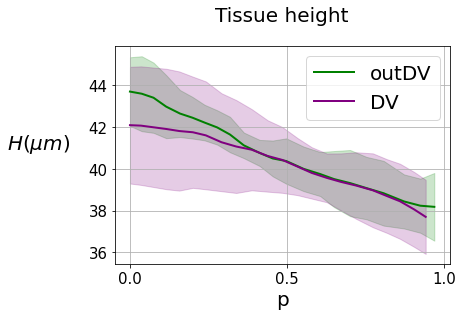

In [45]:
fig,ax = plt.subplots()

title = "Tissue height"
ylabel = r"$H(\mu m)$"
xlabel = "p"
xticks = [0, 0.5, 1]
xlim = None
ylim = None


for i in range(len(rois)):
    
    roi = rois[i]
    
    query_str = '(devstage == "' + devstage + '") & (region == "' + roi + '")'

    ax = get_subplot(ax, df = None,  #df_pool_k, 
                     stat_df = df_pool_devstage, df_cases_col='discName',
                     query_str = query_str, x_col = 'distanceFraction', y_col = 'height', 
                     xlabel = xlabel, ylabel = ylabel, title = title,
                     xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                     individual_color=color_dict[roi],individual_linewidth =1.2, 
                     mean_color=color_dict[roi],mean_linewidth =2,
                     mean_label=roi, ylabelpad = 50, 
                    )
    
ax.legend(fontsize = 20)
ax.grid()

Because the height profile of the two regions is indistinguishable, we pool the two regions and make a single fit

In [55]:
groupby_cols = ['devstage', 
                #'region', 
                'k_dist']
#here we pool discs within a devstage and calculate the mean and std
df_pool = df_pool_k.groupby(groupby_cols).agg(['mean', 'std']).reset_index()
colnames = [x[0]+'_'+x[1] if x[0] not in groupby_cols else x[0] for x in df_pool.columns]
df_pool.columns = colnames #removing multi-indexing

df_pool.head()

,devstage,k_dist,cell_id_mean,cell_id_std,k_dist_pathlength_mean,k_dist_pathlength_std,area_mean,area_std,linelength_mean,linelength_std,...,volume_mean,volume_std,distanceFraction_mean,distanceFraction_std,k_fromDV_mean,k_fromDV_std,pathlength_scaled_mean,pathlength_scaled_std,fit_height_mean,fit_height_std
0,wL3,0,11381.159821,743.507230,0.000000,0.000000,4.209235,0.693971,0.000000,0.000000,...,179.804805,32.953028,0.000000,0.000000,0.0,0.0,0.000000,0.000000,42.907305,0.895910
1,wL3,1,11595.441360,258.281585,2.243339,0.103451,4.686871,0.424007,2.214709,0.093382,...,200.002912,24.043493,0.036053,0.001823,0.0,0.0,0.037070,0.001396,42.719056,0.785106
2,wL3,2,11587.799396,185.655027,4.661374,0.213776,4.496327,0.422286,4.661321,0.229949,...,191.106934,21.006887,0.074874,0.002754,0.0,0.0,0.077052,0.003567,42.522180,0.689270
3,wL3,3,11417.377143,413.598059,7.220962,0.425675,4.507098,0.502257,7.202419,0.466952,...,190.943144,25.823714,0.115915,0.004123,0.0,0.0,0.119347,0.006714,42.311893,0.591582
4,wL3,4,11423.568275,212.534265,9.837372,0.544004,4.221675,0.448954,9.869631,0.579482,...,177.377393,16.888895,0.157934,0.005265,0.0,0.0,0.162538,0.007380,42.091463,0.484973


[-5.15662077 42.06097545]
[[ 0.08229637 -0.02449713]
 [-0.02449713  0.01408035]]


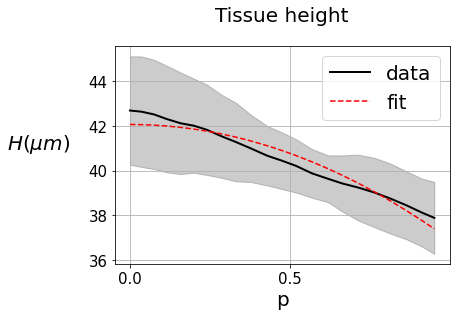

In [62]:
fig,ax = plt.subplots()
devstage = 'wL3'
title = "Tissue height"
ylabel = r"$H(\mu m)$"
xlabel = "p"
xticks = [0, 0.5, 1]
xlim = None
ylim = None

query_str = '(devstage == "' + devstage + '")'

ax = get_subplot(ax, df = None,  #df_pool_k, 
                 stat_df = df_pool, df_cases_col='discName',
                 query_str = query_str, x_col = 'distanceFraction', y_col = 'height', 
                 xlabel = xlabel, ylabel = ylabel, title = title,
                 xticks = xticks, yticks = yticks, xlim = xlim, ylim = ylim,
                 individual_color=color_dict[roi],individual_linewidth =1.2, 
                 mean_color='black',mean_linewidth =2,
                 mean_label="data", ylabelpad = 50, 
                )


from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x*x + b
popt, pcov = curve_fit(func, df_pool["distanceFraction_mean"], df_pool["height_mean"])

print(popt)
print(pcov)

ax.plot(df_pool["distanceFraction_mean"], func(df_pool["distanceFraction_mean"], *popt), label = "fit", linestyle = "--", color = "red")

ax.legend(fontsize = 20)

We want to get the Height relative to the height at the edge. Hence we normalize the coefficients by the value of the fit function at $x=1$.

[-0.13972933036931295, 0, 1.1397293303693128]


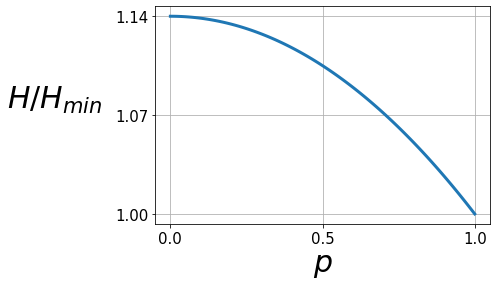

In [87]:
offset = func(1, *popt)
coeffs = [popt[0]/offset, 0, popt[1]/offset]
print(coeffs)
poly_obj = np.poly1d(coeffs)

fig,ax = plt.subplots()
xs = np.linspace(0,1,100)
ax.plot(xs, poly_obj(xs), linewidth = 3)
ax.set_xlabel(r'$p$', fontsize=30)
ax.set_ylabel(r"$H / H_{min}$", fontsize=30, rotation = "horizontal", labelpad = 60) 
ax.set_xticks([0,0.5,1])
ax.set_yticks([1,1.07,1.14])
ax.grid()
ax.tick_params(axis='both', which='major', labelsize=15)